<a href="https://colab.research.google.com/github/EuroCC-Greece/ml-julia/blob/main/Machine_Learning_for_Structured_Datasets_with_MIT%E2%80%99s_Julia_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

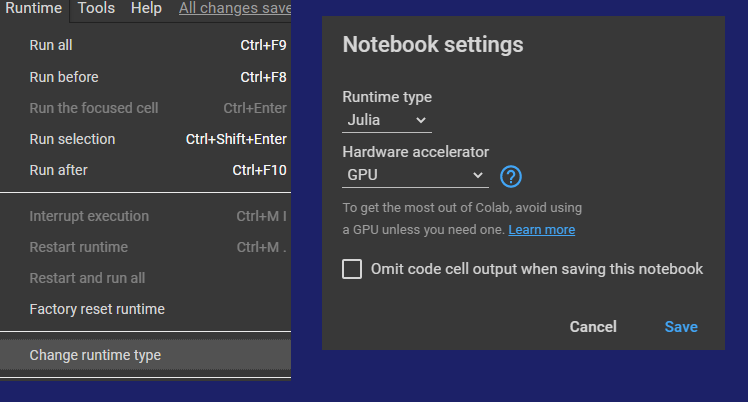

Ensure you have the correct settings

---
# References

This work is based on 
https://colab.research.google.com/github/ageron/julia_notebooks/blob/master/Julia_Colab_Notebook_Template.ipynb

---
Packages

https://juliapackages.com/packages

---

# Install <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> 

## Execute the following cell 
(click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.


In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2022-11-16 06:55:33 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package CUDA...


---
# Reload this page
(press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

---

# Add Packages

## Check version info

In [ ]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/lib64-nvidia
  LD_PRELOAD = /usr/lib/x86_64-linux-gnu/libtcmalloc.so.4
  JULIA_NUM_THREADS = 2


## Install

In [ ]:
import Pkg
Pkg.add("CSV"); 
Pkg.add("DataFrames"); 
Pkg.add("LinearAlgebra"); 
Pkg.add("Statistics"); 
Pkg.add("PyPlot")
Pkg.add("StatsBase"); 
Pkg.add("XGBoost"); 
Pkg.add("DecisionTree");
Pkg.add("FileIO"); 
Pkg.add("Random"); 
Pkg.add("CUDA"); 

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Chan

## Import Packages

In [ ]:
using CSV, DataFrames, LinearAlgebra, Statistics, Dates, Random, XGBoost, DecisionTree, FileIO, Random, Base.Threads

In [ ]:
using PyPlot: plot as plot, bar as bar, scatter as scatter, legend as legend, show as show, title as title, hist as hist

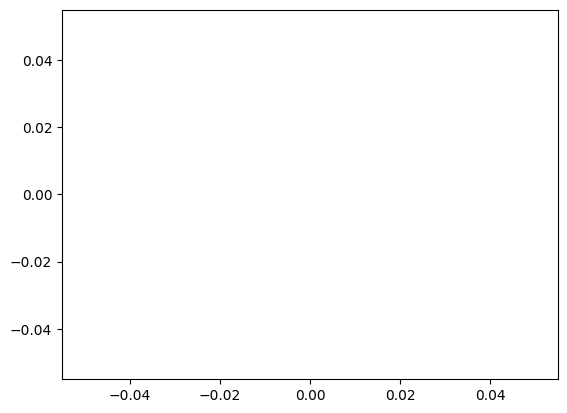

Any[]

In [ ]:
plot()

In [ ]:
using CUDA

In [ ]:
CUDA.allowscalar(false)
cu(rand(10,10))

10×10 CuArray{Float32, 2, CUDA.Mem.DeviceBuffer}:
 0.858748  0.33207    0.783673  0.545949   …  0.0920565  0.622605  0.175004
 0.45049   0.986341   0.13434   0.232162      0.298143   0.625261  0.797366
 0.167977  0.0506215  0.647061  0.205768      0.381917   0.336344  0.360354
 0.158935  0.129139   0.622151  0.449304      0.734585   0.306825  0.717619
 0.390715  0.865626   0.836861  0.571801      0.382371   0.964016  0.207304
 0.334287  0.0666772  0.709312  0.355984   …  0.244729   0.292302  0.508255
 0.993751  0.817868   0.207878  0.257497      0.820367   0.476192  0.22164
 0.98902   0.745826   0.866774  0.0105833     0.723201   0.597347  0.960075
 0.211088  0.577999   0.639249  0.155849      0.294778   0.562942  0.451612
 0.771126  0.658428   0.840416  0.796887      0.853332   0.478842  0.412564

everything has been set up. Start Computing!

In [ ]:
x=10.0.*rand(Float32, 10).+5

10-element Vector{Float64}:
 10.562732815742493
 12.07104742527008
 10.42585015296936
  8.735708594322205
  9.791149497032166
 12.871663570404053
 10.960403680801392
  9.22801673412323
  6.958666443824768
 11.644290685653687

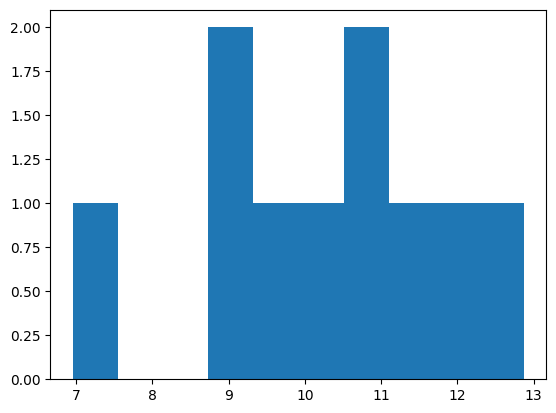

([1.0, 0.0, 0.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0], [6.958666443824768, 7.5499661564826965, 8.141265869140625, 8.732565581798553, 9.323865294456482, 9.91516500711441, 10.506464719772339, 11.097764432430267, 11.689064145088196, 12.280363857746124, 12.871663570404053], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x7f1fbb67a610>, PyObject <matplotlib.patches.Rectangle object at 0x7f1fbb65cad0>, PyObject <matplotlib.patches.Rectangle object at 0x7f1fbb67ad10>, PyObject <matplotlib.patches.Rectangle object at 0x7f1fbb67a910>, PyObject <matplotlib.patches.Rectangle object at 0x7f1fbb6043d0>, PyObject <matplotlib.patches.Rectangle object at 0x7f1fbb604890>, PyObject <matplotlib.patches.Rectangle object at 0x7f1fbb604d10>, PyObject <matplotlib.patches.Rectangle object at 0x7f1fbb604490>, PyObject <matplotlib.patches.Rectangle object at 0x7f1fbb604290>, PyObject <matplotlib.patches.Rectangle object at 0x7f1fbb6047d0>])

In [ ]:
hist(x)

In [ ]:
a=rand(Float32, 1, 199)

1×199 Matrix{Float32}:
 0.00996846  0.805651  0.317178  0.896856  …  0.643155  0.0707503  0.0655183

In [ ]:
x.^a

10×199 Matrix{Float64}:
 1.02378  6.68046  2.11212  8.28285  …   9.6983   4.55456  1.1815   1.16701
 1.02514  7.4389   2.20346  9.33618     11.0297   4.96283  1.19271  1.17726
 1.02364  6.61062  2.1034   8.18652      9.57714  4.51651  1.18041  1.16602
 1.02184  5.73268  1.98865  6.98568      8.07616  4.03088  1.16573  1.15258
 1.023    6.28443  2.06191  7.73811      9.01459  4.3377   1.17517  1.16123
 1.0258   7.8339   2.2488   9.88968  …  11.7339   5.1721   1.19814  1.18223
 1.02415  6.88235  2.13703  8.56198     10.05     4.66411  1.18459  1.16984
 1.0224   5.99156  2.02354  7.33775      8.51437  4.17555  1.17026  1.15673
 1.01953  4.77289  1.85025  5.69671      6.4865   3.48237  1.14712  1.13554
 1.02477  7.22628  2.17845  9.03961     10.6537   4.84926  1.18967  1.17449

In [ ]:
range(0,99,length=100)

0.0:1.0:99.0

In [ ]:
collect(range(0,99,length=100))'

1×100 adjoint(::Vector{Float64}) with eltype Float64:
 0.0  1.0  2.0  3.0  4.0  5.0  6.0  …  94.0  95.0  96.0  97.0  98.0  99.0

In [ ]:
p=Int64.(collect(range(0,99,length=100))')

1×100 Matrix{Int64}:
 0  1  2  3  4  5  6  7  8  9  10  11  …  91  92  93  94  95  96  97  98  99

# Usage Examples

## Plots

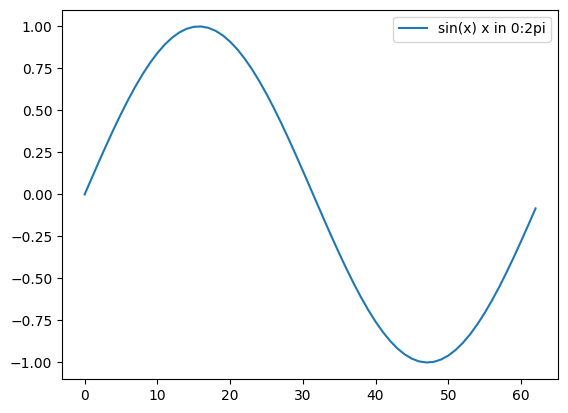

PyObject <matplotlib.legend.Legend object at 0x7f1fbb5e4110>

In [ ]:
plot(sin.(0:0.1:2*3.14), label="sin(x) x in 0:2pi")
legend()

## Matrices

In [ ]:
X=rand(1_000,10_000)
Y=rand(10_000,1_000)

10000×1000 Matrix{Float64}:
 0.280511   0.931791    0.401442   …  0.185412    0.320729   0.537514
 0.340941   0.372463    0.851481      0.356456    0.188812   0.74274
 0.580692   0.303642    0.986756      0.693932    0.627616   0.199927
 0.758241   0.527754    0.505478      0.192721    0.349945   0.208515
 0.746582   0.360868    0.322464      0.137469    0.612328   0.713245
 0.193946   0.282167    0.63443    …  0.913282    0.834175   0.477253
 0.799576   0.285139    0.016732      0.237847    0.162457   0.383915
 0.0647915  0.259703    0.260034      0.12355     0.539398   0.906827
 0.497861   0.212597    0.940401      0.753452    0.0137327  0.572075
 0.259665   0.638152    0.833499      0.869592    0.719757   0.56635
 0.199114   0.437469    0.507721   …  0.300287    0.294898   0.980378
 0.157232   0.889778    0.561896      0.760457    0.945609   0.751911
 0.518702   0.415195    0.210207      0.0963146   0.864832   0.964269
 ⋮                                 ⋱                         
 0

In [ ]:
X*Y

1000×1000 Matrix{Float64}:
 2495.57  2498.06  2522.31  2512.9   …  2522.02  2525.71  2517.69  2509.03
 2508.51  2505.75  2524.55  2517.27     2550.97  2509.31  2520.84  2512.71
 2492.53  2510.51  2534.55  2515.13     2536.72  2507.17  2531.96  2497.11
 2490.17  2468.44  2520.66  2500.79     2522.71  2497.72  2514.65  2512.43
 2473.54  2469.69  2509.93  2497.87     2503.93  2484.41  2501.54  2485.8
 2487.67  2481.48  2511.85  2504.12  …  2518.05  2503.78  2523.54  2502.08
 2481.91  2448.89  2495.06  2475.37     2497.17  2484.52  2507.58  2487.35
 2494.61  2501.9   2534.51  2502.32     2546.7   2516.91  2521.41  2523.21
 2501.82  2475.86  2516.68  2504.27     2520.21  2508.54  2526.33  2479.05
 2489.51  2487.0   2527.71  2512.28     2526.5   2508.51  2523.58  2494.21
 2518.16  2488.87  2539.54  2516.04  …  2515.14  2519.97  2543.77  2519.74
 2475.9   2480.46  2494.8   2488.54     2488.88  2486.43  2502.09  2494.94
 2505.03  2486.56  2529.26  2504.33     2535.25  2521.04  2520.66  2505.96

In [ ]:
t1=now()
for i=1:10 
  X*Y 
end
t2=now()
t2-t1

4951 milliseconds

In [ ]:
cuX = cu(X)
cuY = cu(Y)

10000×1000 CuArray{Float32, 2, CUDA.Mem.DeviceBuffer}:
 0.280511   0.931791    0.401442   …  0.185412    0.320729   0.537513
 0.340941   0.372463    0.851481      0.356456    0.188812   0.742739
 0.580692   0.303642    0.986756      0.693932    0.627616   0.199927
 0.758241   0.527754    0.505478      0.192721    0.349945   0.208515
 0.746582   0.360868    0.322464      0.137469    0.612328   0.713245
 0.193946   0.282167    0.63443    …  0.913282    0.834175   0.477253
 0.799576   0.285139    0.016732      0.237847    0.162457   0.383915
 0.0647915  0.259703    0.260034      0.12355     0.539398   0.906827
 0.497861   0.212597    0.940401      0.753452    0.0137327  0.572075
 0.259665   0.638152    0.833499      0.869592    0.719757   0.56635
 0.199114   0.437469    0.507721   …  0.300287    0.294898   0.980378
 0.157232   0.889778    0.561897      0.760457    0.945609   0.751911
 0.518702   0.415195    0.210207      0.0963146   0.864832   0.964269
 ⋮                                 ⋱

In [ ]:
cuX*cuY

1000×1000 CuArray{Float32, 2, CUDA.Mem.DeviceBuffer}:
 2495.57  2498.06  2522.31  2512.91  …  2522.02  2525.71  2517.69  2509.03
 2508.51  2505.75  2524.54  2517.26     2550.97  2509.31  2520.83  2512.71
 2492.53  2510.51  2534.55  2515.13     2536.72  2507.17  2531.96  2497.11
 2490.17  2468.44  2520.66  2500.79     2522.71  2497.72  2514.65  2512.43
 2473.54  2469.69  2509.93  2497.87     2503.93  2484.41  2501.54  2485.8
 2487.67  2481.48  2511.85  2504.12  …  2518.05  2503.78  2523.54  2502.08
 2481.91  2448.89  2495.06  2475.37     2497.17  2484.52  2507.58  2487.35
 2494.61  2501.91  2534.51  2502.32     2546.7   2516.92  2521.41  2523.21
 2501.82  2475.86  2516.68  2504.27     2520.21  2508.54  2526.33  2479.05
 2489.51  2487.0   2527.71  2512.28     2526.5   2508.51  2523.58  2494.21
 2518.16  2488.87  2539.54  2516.04  …  2515.14  2519.97  2543.77  2519.74
 2475.9   2480.46  2494.8   2488.54     2488.88  2486.43  2502.09  2494.94
 2505.03  2486.56  2529.26  2504.33     2535.25

In [ ]:
t1c=now()
for i=1:10 cuX*cuY end
t2c=now()
t2c-t1c

13 milliseconds

In [ ]:
scale_up = (t2-t1)/(t2c-t1c)

380.84615384615387

## Loops

In [ ]:
for i=1:100_000
  if i in 1:1000:100_000
    @show i, sqrt(i)
    #println(i," ",sqrt(i))
  end
end

(i, sqrt(i)) = (1, 1.0)
(i, sqrt(i)) = (1001, 31.63858403911275)
(i, sqrt(i)) = (2001, 44.73253849269008)
(i, sqrt(i)) = (3001, 54.78138369920935)
(i, sqrt(i)) = (4001, 63.25345840347388)
(i, sqrt(i)) = (5001, 70.71774883294857)
(i, sqrt(i)) = (6001, 77.46612162745726)
(i, sqrt(i)) = (7001, 83.6719785830358)
(i, sqrt(i)) = (8001, 89.44830909525345)
(i, sqrt(i)) = (9001, 94.87360012142472)
(i, sqrt(i)) = (10001, 100.00499987500625)
(i, sqrt(i)) = (11001, 104.88565202161828)
(i, sqrt(i)) = (12001, 109.54907576059234)
(i, sqrt(i)) = (13001, 114.02192771568107)
(i, sqrt(i)) = (14001, 118.32582135780845)
(i, sqrt(i)) = (15001, 122.47856955402443)
(i, sqrt(i)) = (16001, 126.49505919204908)
(i, sqrt(i)) = (17001, 130.3878828726044)
(i, sqrt(i)) = (18001, 134.16780537819048)
(i, sqrt(i)) = (19001, 137.84411485442533)
(i, sqrt(i)) = (20001, 141.42489172702236)
(i, sqrt(i)) = (21001, 144.91721774861674)
(i, sqrt(i)) = (22001, 148.32734070291963)
(i, sqrt(i)) = (23001, 151.66080574756288)
(i, sqr

## Parallel Loops

In [ ]:
@threads for i=1:100_000
  if i in 1:1000:100_000
    println(i," ",sqrt(i)," ",threadid())
  end
end

1 1.0 1
50001 223.60903380677624 2
1001 31.63858403911275 2
51001 225.83400983908513 2
2001 44.73253849269008 2
52001 228.0372776543344 2
3001 54.78138369920935 2
53001 230.21946051539604 2
4001 63.25345840347388 2
54001 232.38115241989829 2
5001 70.71774883294857 2
55001 234.5229199886442 2
6001 77.46612162745726 2
56001 236.64530420018903 2
7001 83.6719785830358 2
57001 238.74882198662257 2
8001 89.44830909525345 2
58001 240.83396770389348 2
9001 94.87360012142472 2
59001 242.90121448852412 2
10001 100.00499987500625 2
60001 244.95101551126504 2
11001 104.88565202161828 2
61001 246.98380513709802 2
12001 109.54907576059234 2
62001 249.0 2
13001 114.02192771568107 2
63001 251.0 2
14001 118.32582135780845 2
64001 252.9841892292876 2
15001 122.47856955402443 2
65001 254.95293683344775 2
16001 126.49505919204908 2
66001 256.9065978132909 2
17001 130.3878828726044 2
67001 258.84551377221123 2
18001 134.16780537819048 2
68001 260.7700136135288 2
19001 137.84411485442533 2
69001 262.6804141

In [ ]:
Threads.nthreads()

2

## QR

In [ ]:
mat=rand(Float32, 10_000,10)

10000×10 Matrix{Float32}:
 0.957127   0.559717   0.503969   …  0.429336   0.389669   0.483364
 0.534848   0.150135   0.133392      0.327688   0.446161   0.79588
 0.488131   0.113648   0.743262      0.8799     0.345511   0.221404
 0.429317   0.297865   0.0766404     0.812546   0.105715   0.0764191
 0.483905   0.18983    0.893436      0.875821   0.665749   0.298128
 0.778121   0.439764   0.0590958  …  0.607977   0.893208   0.434038
 0.364414   0.775206   0.0768246     0.5841     0.302017   0.273225
 0.48656    0.512889   0.0972378     0.919284   0.0334881  0.722038
 0.0800315  0.720712   0.925116      0.171129   0.794887   0.357996
 0.983474   0.801762   0.810204      0.950387   0.771153   0.374191
 0.497399   0.649202   0.530822   …  0.833884   0.801531   0.653694
 0.15032    0.523238   0.627088      0.697027   0.850724   0.982079
 0.611923   0.380178   0.541291      0.0973847  0.526751   0.517465
 ⋮                                ⋱                        
 0.689565   0.186687   0.92270

In [ ]:
mat = [mat 2mat -3mat]

10000×30 Matrix{Float32}:
 0.957127   0.559717   0.503969   …  -1.28801   -1.16901   -1.45009
 0.534848   0.150135   0.133392      -0.983064  -1.33848   -2.38764
 0.488131   0.113648   0.743262      -2.6397    -1.03653   -0.664211
 0.429317   0.297865   0.0766404     -2.43764   -0.317144  -0.229257
 0.483905   0.18983    0.893436      -2.62746   -1.99725   -0.894385
 0.778121   0.439764   0.0590958  …  -1.82393   -2.67962   -1.30211
 0.364414   0.775206   0.0768246     -1.7523    -0.906052  -0.819674
 0.48656    0.512889   0.0972378     -2.75785   -0.100464  -2.16611
 0.0800315  0.720712   0.925116      -0.513387  -2.38466   -1.07399
 0.983474   0.801762   0.810204      -2.85116   -2.31346   -1.12257
 0.497399   0.649202   0.530822   …  -2.50165   -2.40459   -1.96108
 0.15032    0.523238   0.627088      -2.09108   -2.55217   -2.94624
 0.611923   0.380178   0.541291      -0.292154  -1.58025   -1.5524
 ⋮                                ⋱                        
 0.689565   0.186687   0.92

In [ ]:
k=rank(mat)

10

In [ ]:
q=qr(mat,Val(true));

In [ ]:
idx =  sort(q.p[1:k])

10-element Vector{Int64}:
 21
 22
 23
 24
 25
 26
 27
 28
 29
 30

In [ ]:
rank(mat[:,idx])

10

In [ ]:
xx = ones(10,3)

10×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [ ]:
sin.(xx)

10×3 Matrix{Float64}:
 0.841471  0.841471  0.841471
 0.841471  0.841471  0.841471
 0.841471  0.841471  0.841471
 0.841471  0.841471  0.841471
 0.841471  0.841471  0.841471
 0.841471  0.841471  0.841471
 0.841471  0.841471  0.841471
 0.841471  0.841471  0.841471
 0.841471  0.841471  0.841471
 0.841471  0.841471  0.841471

In [ ]:
f(x) = tanh(sin(exp(x)))

f (generic function with 1 method)

In [ ]:
mat=rand(10,100)

10×100 Matrix{Float64}:
 0.571402  0.203261  0.272553   0.16633   …  0.983561     0.647857  0.217575
 0.192086  0.611995  0.803146   0.352504     0.659676     0.342487  0.773547
 0.555495  0.331882  0.0783264  0.398122     0.446008     0.715592  0.663056
 0.135733  0.640349  0.800655   0.700237     0.0758235    0.508145  0.206722
 0.285449  0.235347  0.968497   0.965043     0.000141196  0.704943  0.506927
 0.917734  0.18801   0.213354   0.667108  …  0.374052     0.264953  0.282587
 0.325155  0.410085  0.447659   0.867456     0.95964      0.51059   0.356743
 0.315258  0.881331  0.687374   0.642633     0.91534      0.169713  0.0969182
 0.54741   0.874285  0.960032   0.735646     0.353636     0.376581  0.519892
 0.279405  0.758692  0.0852707  0.25714      0.758363     0.296342  0.498186

In [ ]:
f.(mat)

10×100 Matrix{Float64}:
 0.753099  0.735653  0.747398  0.728241  …  0.422535  0.736387  0.738319
 0.73349   0.74556   0.657793  0.756954     0.73278   0.756016  0.678983
 0.755327  0.754938  0.707746  0.760187     0.761578  0.711134  0.731691
 0.721547  0.738522  0.659719  0.717893     0.707109  0.759835  0.736309
 0.749246  0.741459  0.451109  0.45739      0.686628  0.715892  0.759912
 0.533894  0.732684  0.737545  0.730351  …  0.758699  0.746257  0.748846
 0.754211  0.760737  0.761586  0.597637     0.467023  0.759675  0.757327
 0.753079  0.581675  0.72306   0.737885     0.537315  0.728951  0.712385
 0.756315  0.589927  0.46633   0.701264     0.757055  0.758879  0.758995
 0.748394  0.688321  0.709497  0.745045     0.688518  0.750719  0.760413

In [ ]:
cu_mat = cu(mat)

10×100 CuArray{Float32, 2, CUDA.Mem.DeviceBuffer}:
 0.571402  0.203261  0.272553   0.16633   …  0.983561     0.647857  0.217575
 0.192086  0.611995  0.803146   0.352504     0.659676     0.342487  0.773547
 0.555496  0.331882  0.0783264  0.398122     0.446008     0.715592  0.663056
 0.135733  0.640349  0.800655   0.700236     0.0758235    0.508145  0.206722
 0.285449  0.235347  0.968497   0.965043     0.000141196  0.704943  0.506927
 0.917734  0.18801   0.213354   0.667108  …  0.374052     0.264953  0.282587
 0.325155  0.410085  0.447659   0.867456     0.95964      0.51059   0.356743
 0.315258  0.881331  0.687374   0.642633     0.91534      0.169713  0.0969182
 0.54741   0.874285  0.960032   0.735646     0.353636     0.376581  0.519892
 0.279405  0.758692  0.0852707  0.25714      0.758363     0.296342  0.498186

In [ ]:
f.(cu_mat)

10×100 CuArray{Float32, 2, CUDA.Mem.DeviceBuffer}:
 0.753099  0.735653  0.747398  0.728241  …  0.422535  0.736387  0.738319
 0.73349   0.74556   0.657793  0.756954     0.73278   0.756016  0.678983
 0.755327  0.754938  0.707746  0.760187     0.761578  0.711134  0.731691
 0.721547  0.738522  0.659719  0.717893     0.707109  0.759835  0.736309
 0.749246  0.741459  0.451109  0.45739      0.686628  0.715892  0.759912
 0.533894  0.732684  0.737545  0.730351  …  0.758699  0.746257  0.748846
 0.754211  0.760737  0.761586  0.597637     0.467023  0.759675  0.757327
 0.753079  0.581675  0.72306   0.737885     0.537316  0.728951  0.712385
 0.756315  0.589927  0.46633   0.701264     0.757055  0.758879  0.758995
 0.748394  0.688321  0.709497  0.745045     0.688518  0.750719  0.760413

In [ ]:
function g(x)
  v = sum(x)
  k = log(abs(v) + 1)
  return k 
end

g (generic function with 1 method)

In [ ]:
nn = 1:100:1000
mean_all = zeros(length(nn))
k=0
for n in nn
  vec_mean = []
  for i=1:10
    mat = rand(n, n).-1/2
    push!(vec_mean,mean(mat))
  end
  k+=1
  mean_all[k] = mean(vec_mean)
end

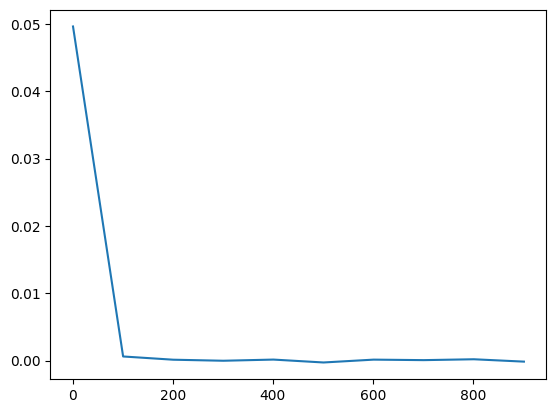

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1fbb3b2a50>

In [ ]:
plot(nn,mean_all)

## Cross Validation Sampling

---
# Regression
---

## Generate Data

In [ ]:
xx=rand(100_000,10)

100000×10 Matrix{Float64}:
 0.690417   0.894322   0.252148   …  0.961264   0.568656  0.609733
 0.466252   0.399638   0.0600107     0.445798   0.709501  0.0368871
 0.134951   0.726213   0.774943      0.0895373  0.323841  0.153936
 0.608987   0.443641   0.184513      0.100018   0.494968  0.595587
 0.73602    0.906072   0.170356      0.0234003  0.136992  0.285811
 0.0215004  0.280962   0.4517     …  0.432491   0.891352  0.665665
 0.0665502  0.76911    0.0621589     0.989399   0.853431  0.556094
 0.397197   0.319104   0.0171512     0.014571   0.956183  0.751617
 0.967177   0.0816509  0.574146      0.233965   0.954347  0.907899
 0.848211   0.696407   0.382954      0.204817   0.463063  0.27572
 0.220042   0.320687   0.426276   …  0.22592    0.556776  0.65589
 0.454257   0.352105   0.642263      0.14603    0.694525  0.516425
 0.246114   0.162926   0.486829      0.198213   0.202248  0.758193
 ⋮                                ⋱                       
 0.140589   0.797138   0.484432      0.05500

In [ ]:
yy=sum(sin.(xx),dims=2)[:].+(rand(size(xx,1)).-1/2)./2

100000-element Vector{Float64}:
 5.261026960156488
 3.7512217909838124
 3.4557530868435404
 4.4517869335763836
 3.893801109913384
 4.377011817584419
 4.533528434736335
 5.1316687187523105
 4.433080319788366
 4.6665131925552
 4.514629038845114
 3.89761022202988
 3.9876743326389543
 ⋮
 3.2743978290962588
 4.653514890012905
 3.4625689797154706
 5.38706610110645
 3.7069445813537505
 4.883183885518235
 6.257331899099973
 4.80044519930053
 4.14879262263154
 4.203204103155572
 5.410386126903979
 4.6423296900579425

## Calculate Weights

We assume that xx*aa = yy

In [ ]:
@time aa=xx\yy

  0.010389 seconds (83 allocations: 8.467 MiB)


10-element Vector{Float64}:
 0.9180058706597536
 0.9159720663262754
 0.916253943372014
 0.9176982694974224
 0.9203879477217359
 0.9171757211813326
 0.9191913052950977
 0.9166494055254125
 0.9138246416650465
 0.9181721692776567

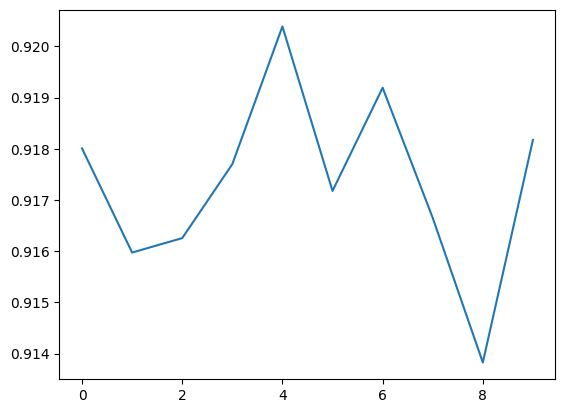

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1fbb39e210>

In [ ]:
plot(aa)

In [ ]:
cuxx=cu(xx)
cuyy=cu(yy)
@time aa=cuxx'*cuxx\cuxx'*cuyy

  0.002294 seconds (145 allocations: 7.375 KiB)


10-element CuArray{Float32, 1, CUDA.Mem.DeviceBuffer}:
 0.9180042
 0.9159715
 0.9162537
 0.9176981
 0.9203885
 0.91717553
 0.919192
 0.9166504
 0.9138265
 0.91817063

In [ ]:
aa=Vector(aa)

10-element Vector{Float32}:
 0.9180042
 0.9159715
 0.9162537
 0.9176981
 0.9203885
 0.91717553
 0.919192
 0.9166504
 0.9138265
 0.91817063

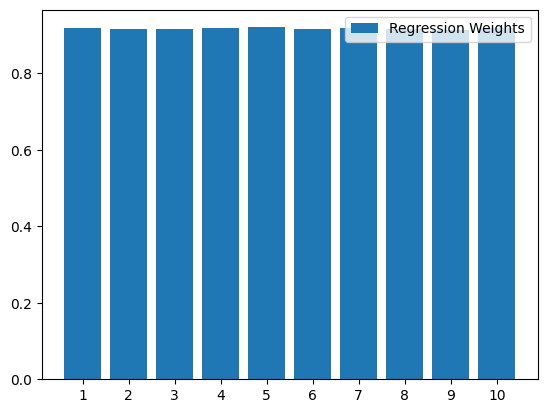

PyObject <matplotlib.legend.Legend object at 0x7f1fbb3c37d0>

In [ ]:
bar(string.(1:10),aa,label="Regression Weights")
legend()

## Predict

In [ ]:
pred=xx*aa

100000-element Vector{Float64}:
 5.223783167515208
 3.5724343283614832
 3.577272686823174
 4.359583569938527
 4.20797266944716
 4.457584578643596
 4.623529391365097
 4.971240749528404
 4.465406478690918
 4.6027741627101335
 4.228230801670927
 3.6922912884034096
 4.007243798200825
 ⋮
 3.4196228362075303
 4.3980429562797365
 3.564242102306787
 5.5510830534108635
 3.4090600528404256
 5.157496583614494
 6.047180033387825
 4.70217896657784
 4.5119535730772755
 4.194557228646575
 5.491670765942414
 4.611299078655749

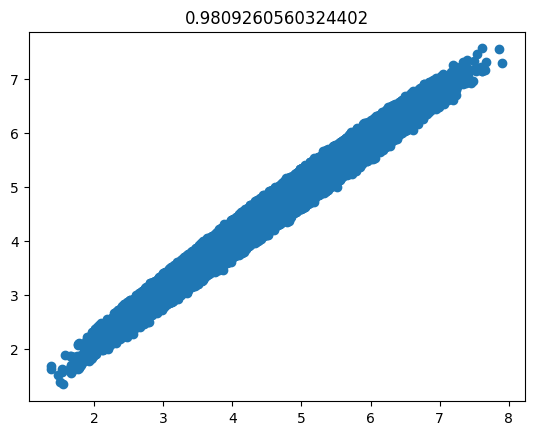

PyObject Text(0.5, 1.0, '0.9809260560324402')

In [ ]:
scatter(pred,yy)
title(string(cor(pred,yy)))

## Add nonlinear Terms

In [ ]:
aa=[xx xx.^2 xx.^3]\yy

30-element Vector{Float64}:
  0.9732104327673544
  0.9874925014272407
  1.003772498642484
  1.014035381738456
  1.0165203995339271
  1.0159026746224304
  1.0228542229000945
  1.0035971043419996
  1.0206717628009774
  0.9710466527511404
  0.052573878749293444
  0.021135644577650273
 -0.012120893791962638
  ⋮
 -0.06996354786613308
  0.0536871591991324
 -0.1872732270246683
 -0.17314071873910164
 -0.15158968328132616
 -0.12226430494819962
 -0.13843895098981165
 -0.12788377820644703
 -0.11855775907815785
 -0.15059564099878942
 -0.1096042927850498
 -0.1871087943307512

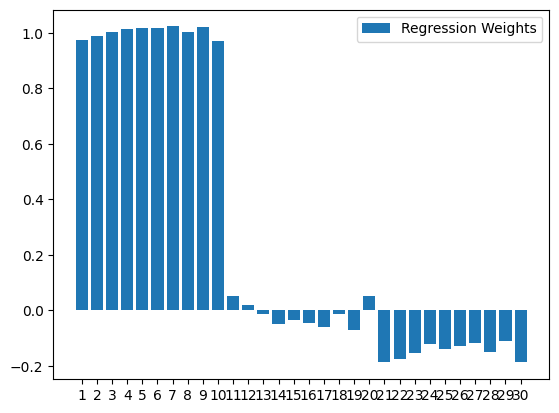

In [ ]:
bar(string.(1:length(aa)),aa,label="Regression Weights")
legend()
show()

In [ ]:
mean(aa[11:20])

-0.01531046036474067

In [ ]:
mean(aa[21:end])

-0.14664571503823026

In [ ]:
pred=[xx xx.^2 xx.^3]*aa

100000-element Vector{Float64}:
 5.217717046379262
 3.6917600876288628
 3.656418651976194
 4.490125439535729
 4.137908541896567
 4.556985199039378
 4.603212739116568
 4.903244160927612
 4.404513521864963
 4.676545155693895
 4.360619463567257
 3.756673674114326
 4.044348885017241
 ⋮
 3.4844198556881305
 4.460921306985816
 3.6307142071480336
 5.565099520547559
 3.5320866951881054
 5.087745458048856
 6.010071022668609
 4.734621715553286
 4.381157279096755
 4.280104481890129
 5.4307530270962925
 4.596999006571718

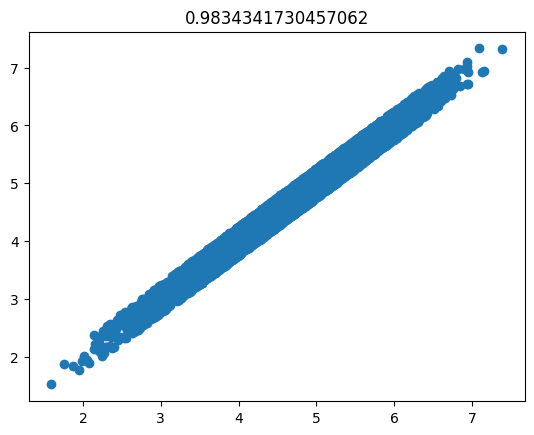

PyObject Text(0.5, 1.0, '0.9834341730457062')

In [ ]:
scatter(pred[1:10:end],yy[1:10:end])
title(cor(pred,yy))

## Error Analysis

In [ ]:
err = yy .- pred

100000-element Vector{Float64}:
  0.04330991377722615
  0.0594617033549496
 -0.20066556513265343
 -0.03833850595934507
 -0.24410743198318308
 -0.17997338145495867
 -0.06968430438023265
  0.22842455782469884
  0.028566797923402554
 -0.0100319631386947
  0.15400957527785675
  0.1409365479155542
 -0.05667455237828678
  ⋮
 -0.21002202659187175
  0.1925935830270884
 -0.168145227432563
 -0.17803341944110862
  0.17485788616564513
 -0.20456157253062113
  0.24726087643136374
  0.065823483747244
 -0.2323646564652142
 -0.07690037873455768
 -0.020366900192313686
  0.04533068348622482

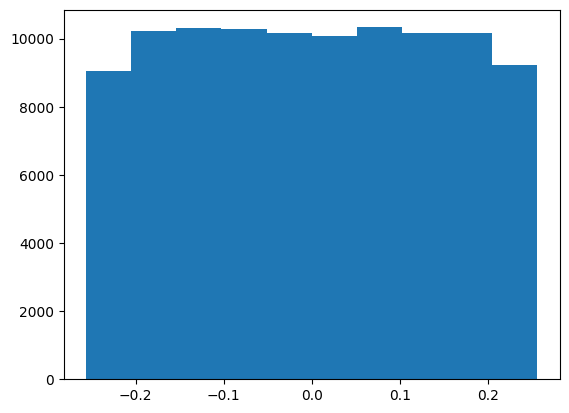

([9058.0, 10219.0, 10308.0, 10284.0, 10150.0, 10078.0, 10332.0, 10175.0, 10172.0, 9224.0], [-0.2562521087952172, -0.2050410210851298, -0.15382993337504242, -0.102618845664955, -0.0514077579548676, -0.000196670244780206, 0.051014417465307216, 0.10222550517539458, 0.153436592885482, 0.20464768059556943, 0.2558587683056568], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x7f1f8d727390>, PyObject <matplotlib.patches.Rectangle object at 0x7f1f8d785850>, PyObject <matplotlib.patches.Rectangle object at 0x7f1f8d727a90>, PyObject <matplotlib.patches.Rectangle object at 0x7f1f8d727e50>, PyObject <matplotlib.patches.Rectangle object at 0x7f1f8d72f150>, PyObject <matplotlib.patches.Rectangle object at 0x7f1f8d72f650>, PyObject <matplotlib.patches.Rectangle object at 0x7f1f8d72fa90>, PyObject <matplotlib.patches.Rectangle object at 0x7f1f8d72fe50>, PyObject <matplotlib.patches.Rectangle object at 0x7f1f8d727690>, PyObject <matplotlib.patches.Rectangle object at 0x7f1f8d72f550>])

In [ ]:
hist(err)

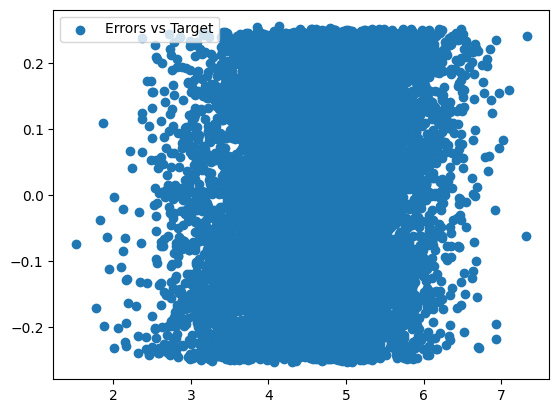

PyObject <matplotlib.legend.Legend object at 0x7f1f8d76d5d0>

In [ ]:
scatter(yy[1:10:end],err[1:10:end],label="Errors vs Target")
legend()

In [ ]:
cor(yy,err)

0.18246166024068852

In [ ]:
iso = sortperm(err[:])[1:10:end]

10000-element Vector{Int64}:
 91993
 32932
 99976
 32480
  7893
 33032
 90817
 82038
 24978
  4986
 59142
 22757
 98880
     ⋮
 67325
 72836
 44501
 42795
 77223
 23501
 11711
 93206
 47109
 60942
 16732
 59615

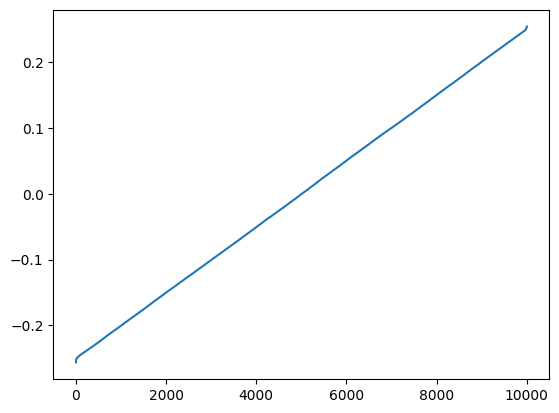

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1f8432e890>

In [ ]:
plot(err[iso])

## Predict for out-of-sample

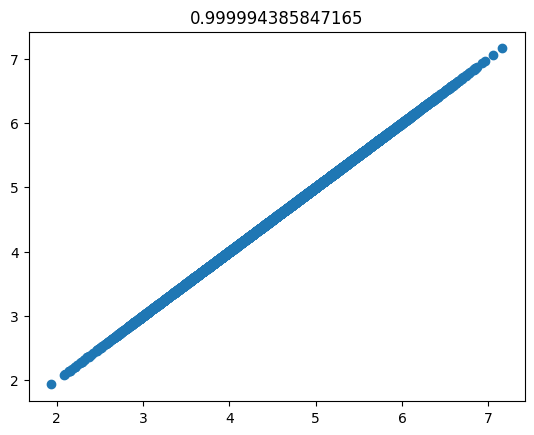

PyObject Text(0.5, 1.0, '0.999994385847165')

In [ ]:
xx_te=rand(10_000,10)
yy_te=sum(sin.(xx_te),dims=2)[:]
pred_te=[xx_te xx_te.^2 xx_te.^3]*aa
scatter(pred_te,yy_te)
title(cor(pred_te,yy_te))

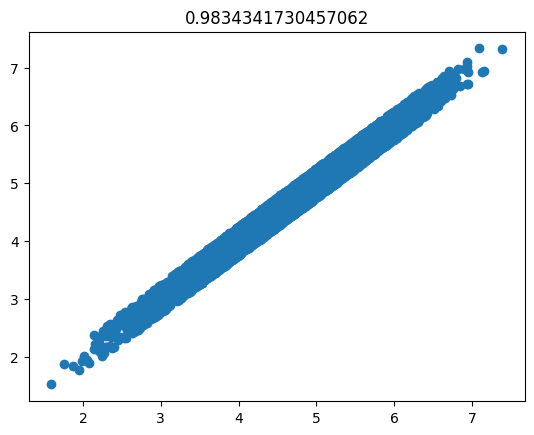

PyObject Text(0.5, 1.0, '0.9834341730457062')

In [ ]:
scatter(pred[1:10:end],yy[1:10:end])
title(cor(pred,yy))

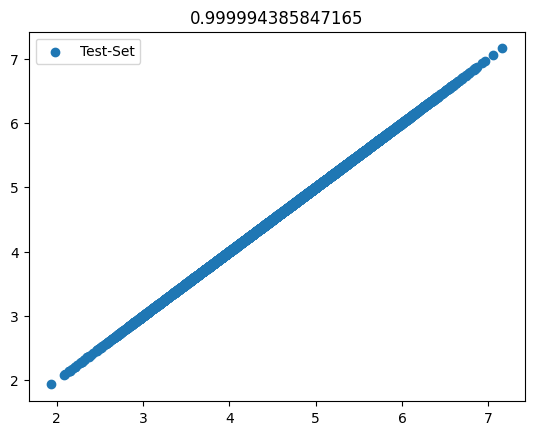

PyObject <matplotlib.legend.Legend object at 0x7f1f81e7cfd0>

In [ ]:
pred_te=[xx_te xx_te.^2 xx_te.^3]*aa
scatter(pred_te,yy_te,label="Test-Set")
title(cor(pred_te,yy_te))
legend()

# Decision Trees

## Clasification

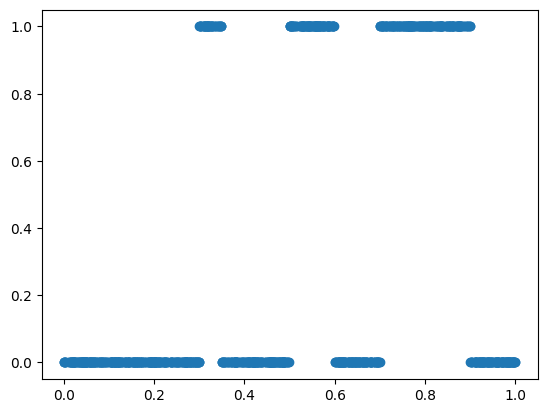

PyObject <matplotlib.collections.PathCollection object at 0x7f1f81db0790>

In [ ]:
obs=1_000
vars=1
xx = rand(obs)
yy = zeros(obs)
yy[0.7.<=xx.<0.9] .= 1.0
yy[0.5.<xx.<0.6] .= 1.0
yy[0.3.<xx.<0.35] .= 1.0
scatter(xx,yy)

### Fit and investigate model

In [ ]:
model = DecisionTreeClassifier(max_depth=100)
DecisionTree.fit!(model, xx[:,:], yy)
DecisionTree.print_tree(model)

Feature 1 < 0.4991 ?
├─ Feature 1 < 0.2996 ?
    ├─ 0.0 : 306/306
    └─ Feature 1 < 0.3495 ?
        ├─ 1.0 : 45/45
        └─ 0.0 : 154/154
└─ Feature 1 < 0.8999 ?
    ├─ Feature 1 < 0.6998 ?
        ├─ Feature 1 < 0.6003 ?
            ├─ 1.0 : 105/105
            └─ 0.0 : 103/103
        └─ 1.0 : 178/178
    └─ 0.0 : 109/109


### Predict for out of sample observations

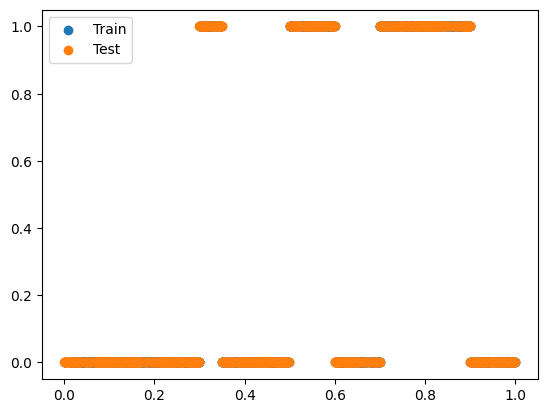

PyObject <matplotlib.legend.Legend object at 0x7f1f81d5f610>

In [ ]:
xx_te = rand(obs)
scatter(xx,yy,label="Train")
scatter(xx_te, DecisionTree.predict(model, xx_te[:,:]),label="Test")
legend()

## Regression

### Generate Data

run and then change noise_factor to 1.0

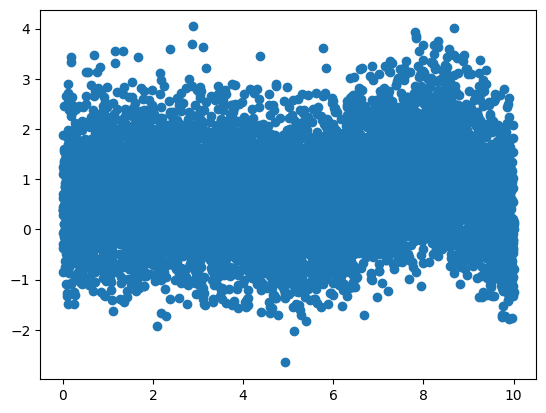

PyObject <matplotlib.collections.PathCollection object at 0x7f1f81c96550>

In [ ]:
noise_factor = 1.0
obs = 10_000
vars = 10
xx = 10rand(obs,vars)
yy = (xx./10).^2 .* sin.(xx)
yy = sum(yy,dims=2)[:] .+ noise_factor.*(rand(obs).-1/2) ## WITH NOISE
scatter(xx[:,1],yy)

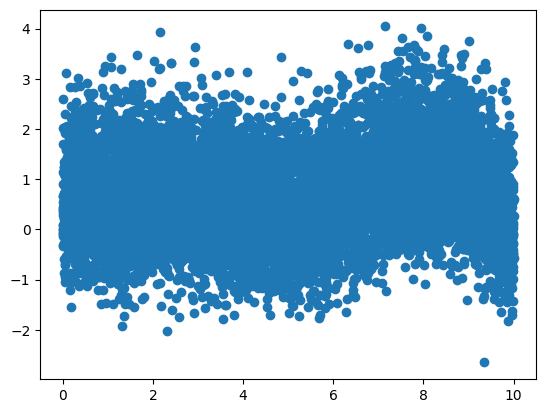

PyObject <matplotlib.collections.PathCollection object at 0x7f1f81c01e10>

In [ ]:
scatter(xx[:,2],yy)

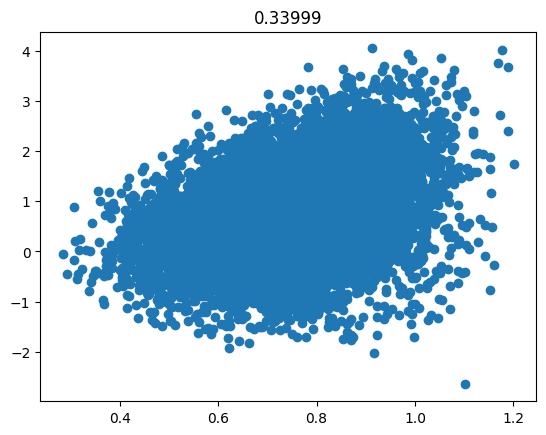

PyObject Text(0.5, 1.0, '0.33999')

In [ ]:
aa=xx\yy
pred=xx*aa
scatter(xx*aa,yy)
title(round(cor(xx*aa,yy),digits=5))

### Build Tree

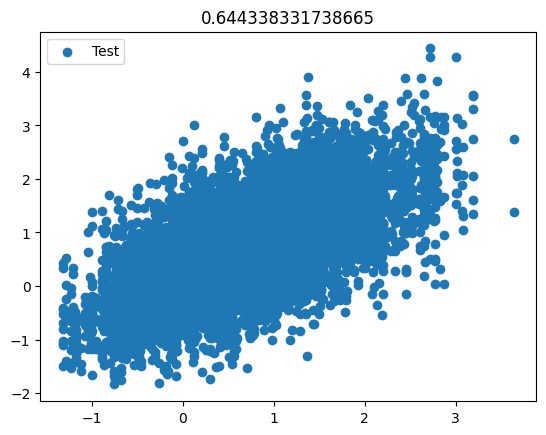

PyObject <matplotlib.legend.Legend object at 0x7f1f81de29d0>

In [ ]:
model = DecisionTreeRegressor(max_depth=1000)
DecisionTree.fit!(model, xx, yy)
pred=DecisionTree.predict(model, xx)
xx_te = 10rand(obs,vars)
yy_te = (xx_te./10).^2 .* sin.(xx_te)
yy_te = sum(yy_te,dims=2)[:]
pred_te = DecisionTree.predict(model, xx_te)
scatter(pred_te,yy_te,label="Test")
title(cor(pred_te,yy_te))
legend()

### Print Model

In [ ]:
DecisionTree.print_tree(model)

Feature 7 < 6.558 ?
├─ Feature 2 < 6.739 ?
    ├─ Feature 3 < 6.626 ?
        ├─ Feature 9 < 6.514 ?
            ├─ Feature 6 < 6.396 ?
                ├─ Feature 8 < 6.696 ?
                    ├─ Feature 10 < 6.1 ?
                        ├─ Feature 4 < 7.021 ?
                            ├─ Feature 1 < 6.057 ?
                                ├─ Feature 5 < 6.587 ?
                                    ├─ Feature 8 < 3.197 ?
                                        ├─ Feature 6 < 3.723 ?
                                            ├─ Feature 6 < 3.313 ?
                                                ├─ Feature 1 < 4.363 ?
                                                    ├─ Feature 9 < 2.411 ?
                                                        ├─ -0.06820258205919003 : 0/5
                                                        └─ -0.37983879514356733 : 0/8
                                                    └─ -0.6312054871323284 : 0/6
                                          

### Create a Random Forest

In [ ]:
model_all = []
ir_col_all = []
n_trees = 100
perc_col = 0.8; n_col = Int64(round(perc_col*vars))
perc_row = 0.7; n_row= Int64(round(perc_row*obs))
@time for i ∈ 1:n_trees
    ir_col = randperm(vars)[1:n_col]    
    ir_row = randperm(obs)[1:n_row]
    model_i = DecisionTreeRegressor(max_depth=100)
    DecisionTree.fit!(model_i, xx[ir_row,ir_col], yy[ir_row])
    push!(model_all, model_i); push!(ir_col_all,ir_col)
end

  3.125740 seconds (677.30 k allocations: 156.416 MiB, 1.23% gc time)


### Predict

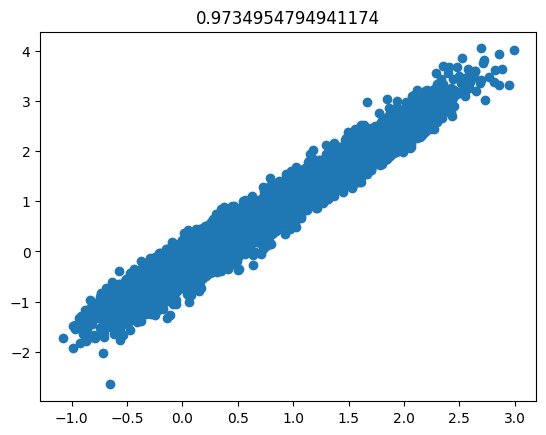

PyObject Text(0.5, 1.0, '0.9734954794941174')

In [ ]:
pred=zeros(obs,n_trees)
pred_te=zeros(obs,n_trees)
for i ∈ 1:n_trees
    pred[:,i] .= DecisionTree.predict(model_all[i], xx[:,ir_col_all[i]])
    pred_te[:,i] .= DecisionTree.predict(model_all[i], xx_te[:,ir_col_all[i]])
end
pred=mean(pred,dims=2)[:]
scatter(pred,yy)
title(cor(pred,yy))

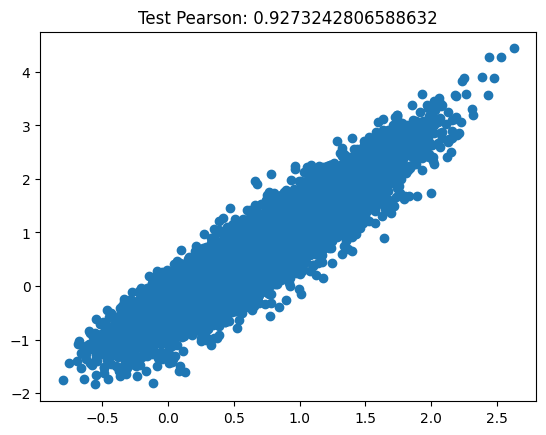

PyObject Text(0.5, 1.0, 'Test Pearson: 0.9273242806588632')

In [ ]:
pred_te=mean(pred_te,dims=2)[:]
scatter(pred_te,yy_te)
title(string("Test Pearson: ",cor(pred_te,yy_te)))

### Create a Random Forest in Parallel

In [ ]:
n_trees = 100
model_all = Vector{DecisionTreeRegressor}(undef,n_trees)
perc_col = 0.8; n_col = Int64(round(perc_col*vars))
perc_row = 0.7; n_row= Int64(round(perc_row*obs))
ir_col_all = zeros(Int64,n_trees,n_col)
@time @threads for i ∈ 1:n_trees
    ir_col = randperm(vars)[1:n_col]
    ir_row = randperm(obs)[1:n_row]
    model_i = DecisionTreeRegressor(max_depth=100)
    DecisionTree.fit!(model_i, xx[ir_row,ir_col], yy[ir_row])
    model_all[i] = model_i
    ir_col_all[i,:] .= ir_col
end

  2.430304 seconds (745.47 k allocations: 160.282 MiB, 2.90% compilation time)


In [ ]:
ir_col_all

100×8 Matrix{Int64}:
  5   9  10   7   6   3   4   8
  4   7  10   8   6   9   5   1
  5   2   8   9   6   7   3   1
  5   1   7   2   9   4   6  10
  9   6   8   1   2   5   7   4
 10   2   3   9   8   6   7   5
  5  10   6   8   9   2   1   4
  4   8   6  10   1   5   3   7
  6   4   3   9   1  10   2   7
  4   5   6  10   9   7   2   8
  4   1   7   6   8   3  10   2
  2   5   3   9  10   7   6   8
  1  10   5   8   6   9   4   3
  ⋮                   ⋮      
  4   6   3   2   5   9   1  10
  8   5   7   9   2  10   1   6
  5   6  10   3   1   7   8   4
  7   5   9   2   1  10   3   6
  5   7   6   8   1   4   3  10
  5   2   4   8   7   9   1   3
  5   1  10   8   3   4   7   2
  7   3   6   4   2   5   1   9
  2  10   7   6   9   4   3   5
  2  10   3   7   8   9   5   1
  1   6   3  10   2   9   4   8
 10   3   8   1   2   4   9   5

In [ ]:
model_all[1]

DecisionTreeRegressor
max_depth:                100
min_samples_leaf:         5
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
root:                     Decision Tree
Leaves: 1123
Depth:  18

In [ ]:
model_all[2]

DecisionTreeRegressor
max_depth:                100
min_samples_leaf:         5
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
root:                     Decision Tree
Leaves: 1121
Depth:  19

### Predict

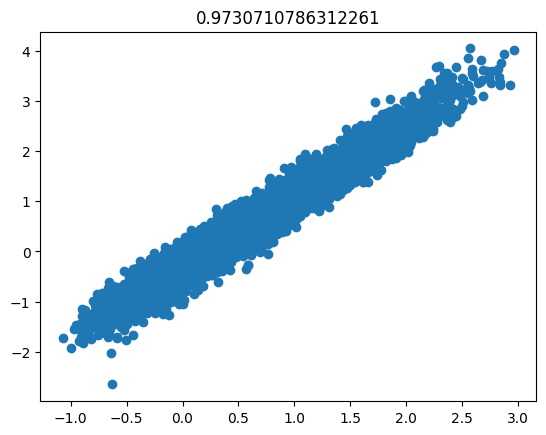

PyObject Text(0.5, 1.0, '0.9730710786312261')

In [ ]:
pred=zeros(obs,n_trees)
pred_te=zeros(obs,n_trees)
for i ∈ 1:n_trees
    pred[:,i] .= DecisionTree.predict(model_all[i], xx[:,ir_col_all[i,:]])
    pred_te[:,i] .= DecisionTree.predict(model_all[i], xx_te[:,ir_col_all[i,:]])
end
pred=mean(pred,dims=2)[:]
scatter(pred,yy)
title(cor(pred,yy))

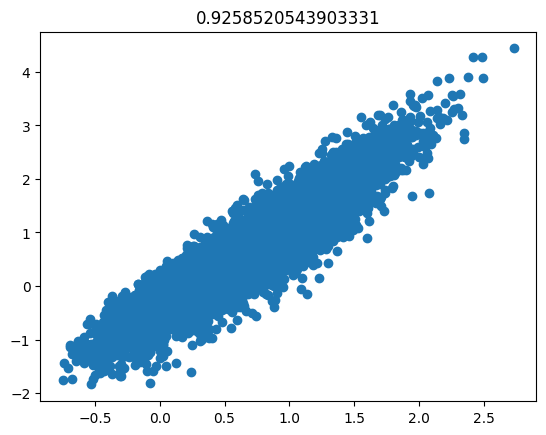

PyObject Text(0.5, 1.0, '0.9258520543903331')

In [ ]:
pred_te=mean(pred_te,dims=2)[:]
scatter(pred_te,yy_te)
title(cor(pred_te,yy_te))